In [54]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import zipfile
from zipfile import ZipFile
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
cwd = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(cwd)
data_zip_file = os.path.join(cwd, 'data/archive.zip')


with zipfile.ZipFile(data_zip_file, 'r') as zip_ref:
    zip_ref.extractall(cwd + '/data/final_csv')

d:\vscode\Healthcare-Ticket-Classification


In [27]:
df  = pd.read_excel(cwd + '/data/final_csv/final.xlsx')

In [28]:
df = df.sample(random_state=42, frac=0.1)

In [33]:
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
39973,39974,Georgia,Male,Very good,Age 55 to 59,1.83,122.470001,36.619999,0,0,0,0,0,0,0,0,0,Yes,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
169551,169552,Pennsylvania,Female,Very good,Age 30 to 34,1.60,57.610001,22.500000,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
132069,132070,New Jersey,Female,Excellent,Age 50 to 54,1.55,53.520000,22.299999,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",1,1,0,0,"No, did not receive any tetanus shot in the pa...",0,0
216716,216717,Washington,Male,Excellent,Age 40 to 44,1.78,86.180000,27.260000,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Former smoker,Never used e-cigarettes in my entire life,1,"Other race only, Non-Hispanic",0,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
151299,151300,Ohio,Male,Fair,Age 60 to 64,1.83,113.400002,33.910000,0,0,1,0,0,0,0,0,1,Yes,0,0,0,0,0,0,Former smoker,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23763 entries, 39973 to 115311
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  23763 non-null  int64  
 1   State                      23763 non-null  object 
 2   Sex                        23763 non-null  object 
 3   GeneralHealth              23763 non-null  object 
 4   AgeCategory                23763 non-null  object 
 5   HeightInMeters             23763 non-null  float64
 6   WeightInKilograms          23763 non-null  float64
 7   BMI                        23763 non-null  float64
 8   HadHeartAttack             23763 non-null  int64  
 9   HadAngina                  23763 non-null  int64  
 10  HadStroke                  23763 non-null  int64  
 11  HadAsthma                  23763 non-null  int64  
 12  HadSkinCancer              23763 non-null  int64  
 13  HadCOPD                    23763 non-null  int

In [35]:
df.describe()

,PatientID,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000
mean,119181.783192,1.705511,83.523732,28.626192,0.056769,0.063250,0.042798,0.149139,0.084291,0.078399,0.205445,0.046290,0.351681,0.088583,0.050415,0.108488,0.148214,0.035433,0.068047,0.423095,0.547826,0.336616,0.530741,0.406683,0.044649,0.293860
std,68767.231085,0.106803,21.172929,6.465045,0.231405,0.243416,0.202405,0.356233,0.277829,0.268804,0.404035,0.210118,0.477505,0.284147,0.218803,0.311002,0.355319,0.184876,0.251832,0.494061,0.497718,0.472562,0.499065,0.491225,0.206537,0.455538
min,7.000000,1.040000,31.750000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59431.000000,1.630000,68.040001,24.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,119123.000000,1.700000,81.650002,27.440001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,178530.000000,1.780000,95.250000,31.889999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,237617.000000,2.110000,231.789993,97.650002,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df.isnull().sum()

PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

<Axes: >

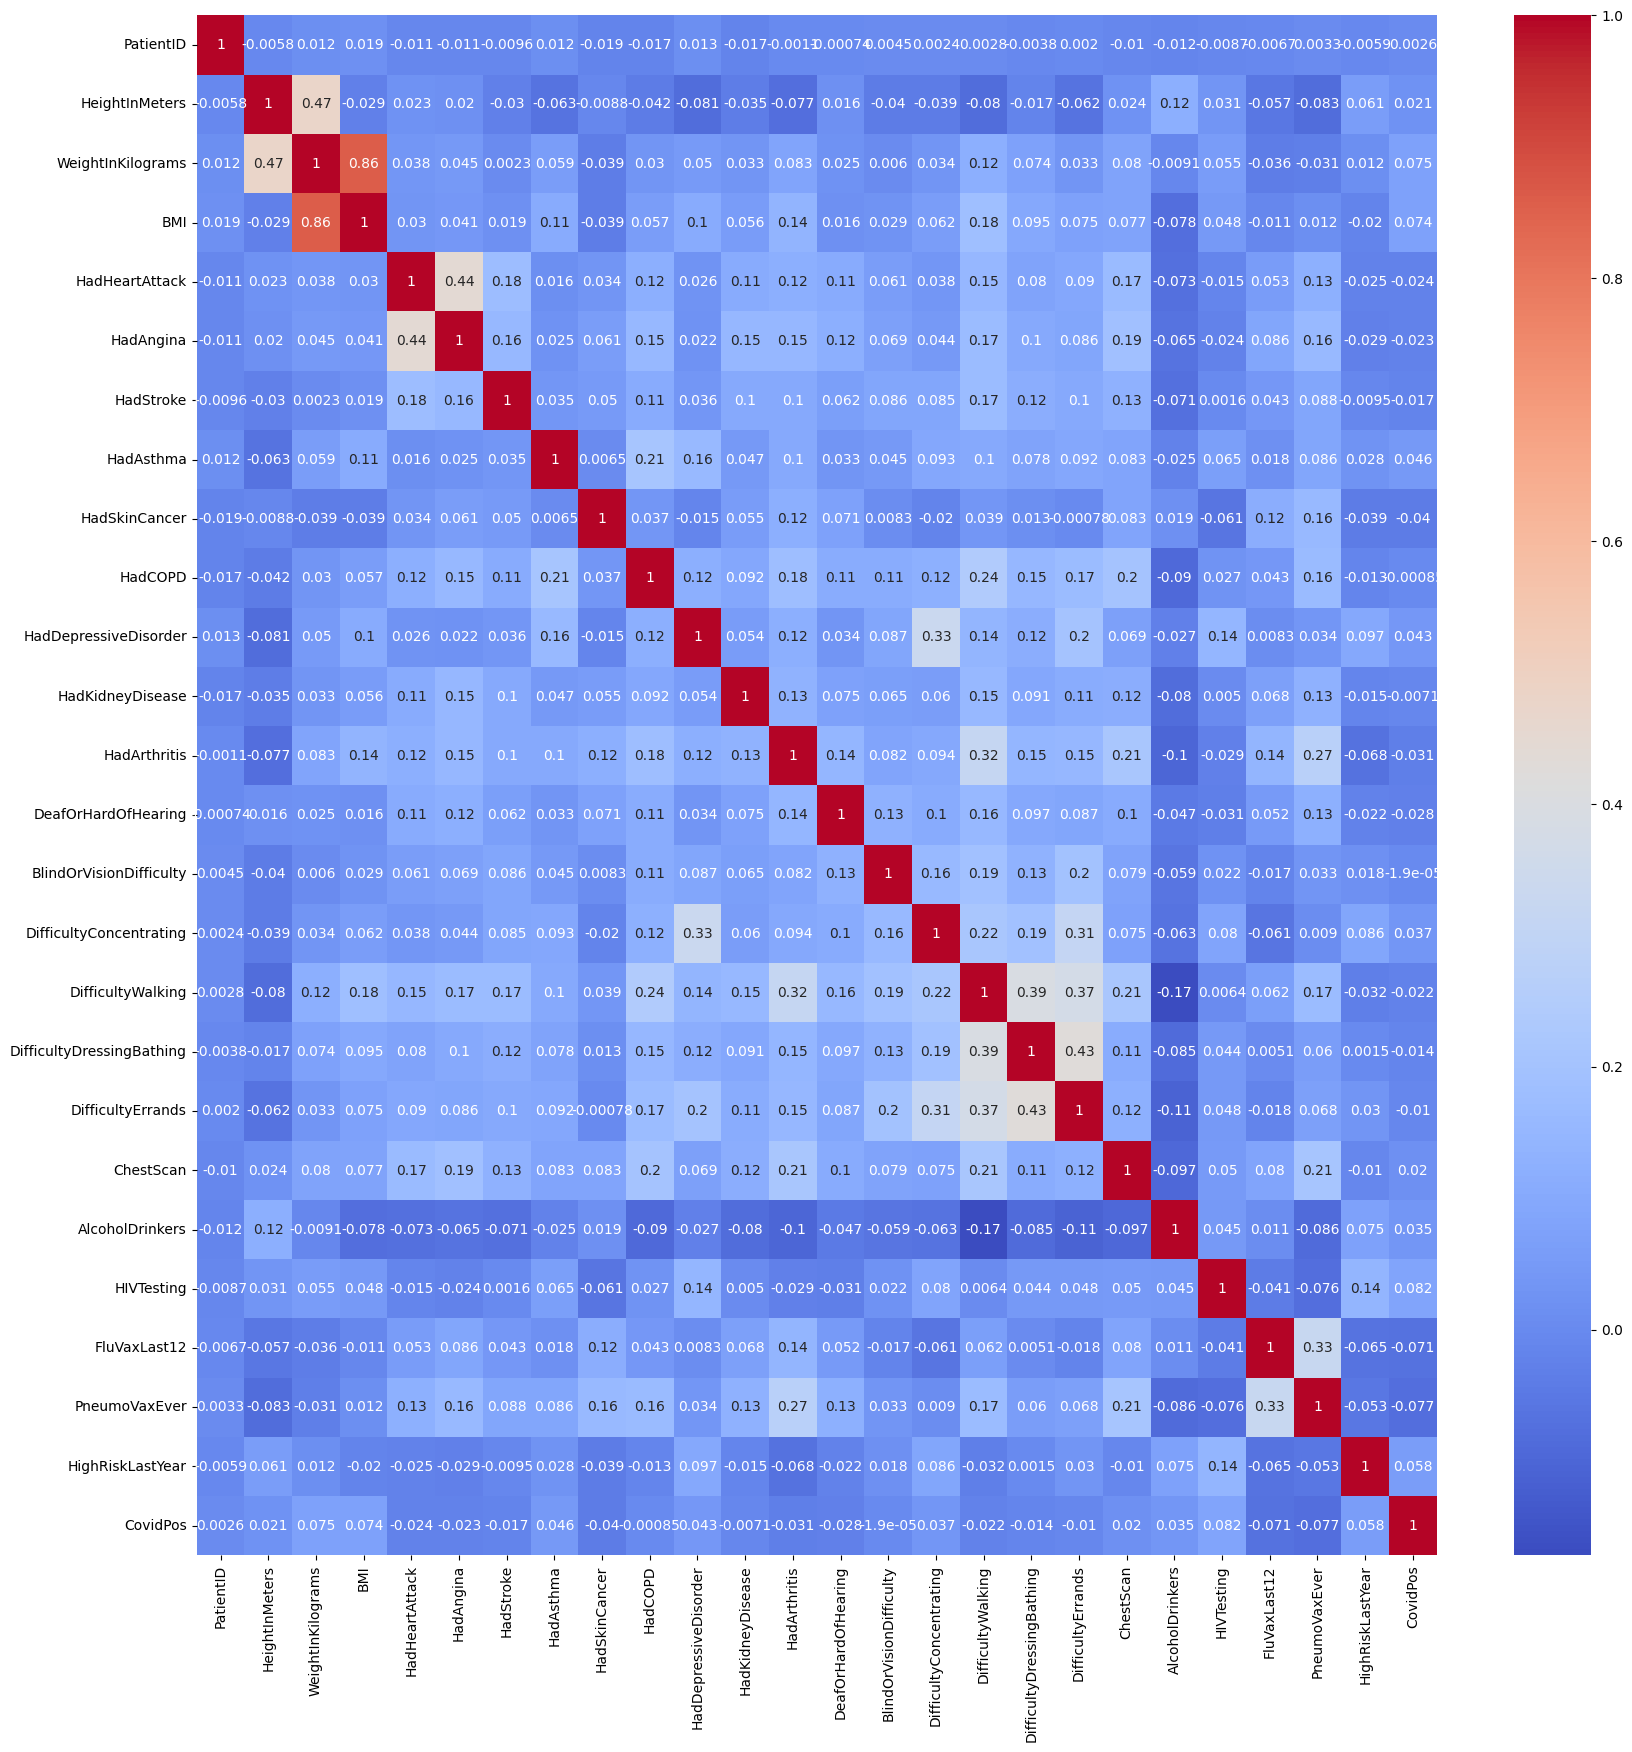

In [47]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [56]:
threshold = 0.8
high_corr_pairs = [(col1, col2) for col1 in corr.columns for col2 in corr.columns if col1 != col2 and abs(corr.loc[col1, col2]) > threshold]
high_corr_columns = set([col for pair in high_corr_pairs for col in pair])

low_corr_pairs = [(col1, col2) for col1 in corr.columns for col2 in corr.columns if col1 != col2 and abs(corr.loc[col1, col2]) < threshold]
low_corr_columns = set([col for pair in low_corr_pairs for col in pair])

print("Columns with high correlation:", list(high_corr_columns))
print("Columns with low correlation:", (low_corr_columns))


Columns with high correlation: ['WeightInKilograms', 'BMI']
Columns with low correlation: {'BlindOrVisionDifficulty', 'ChestScan', 'FluVaxLast12', 'PneumoVaxEver', 'CovidPos', 'HadStroke', 'HadArthritis', 'HIVTesting', 'HadHeartAttack', 'HadAsthma', 'HadKidneyDisease', 'DifficultyDressingBathing', 'HadDepressiveDisorder', 'HadSkinCancer', 'HeightInMeters', 'DifficultyWalking', 'DifficultyErrands', 'BMI', 'HighRiskLastYear', 'DeafOrHardOfHearing', 'HadAngina', 'AlcoholDrinkers', 'WeightInKilograms', 'PatientID', 'HadCOPD', 'DifficultyConcentrating'}


In [58]:
df.dtypes

PatientID                      int64
State                         object
Sex                           object
GeneralHealth                 object
AgeCategory                   object
HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                   object
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                      int64
R

In [68]:
#Creating a new column for the height in feet for better understanding
df['HeighInFeet'] = df['HeightInMeters'] * 3.28084

In [84]:
def plot_height_weight_scatter(df,feature1,feature2):
    plt.scatter(df[feature1], df[feature2],color='red')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Scatter plot between Height and Weight')
    plt.show()



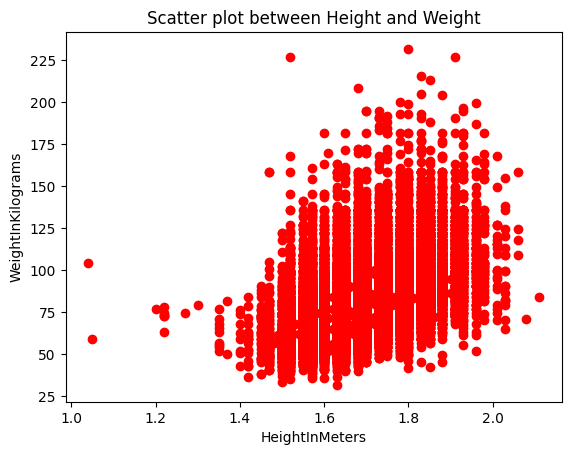

In [85]:
plot_height_weight_scatter(df,'HeightInMeters','WeightInKilograms')

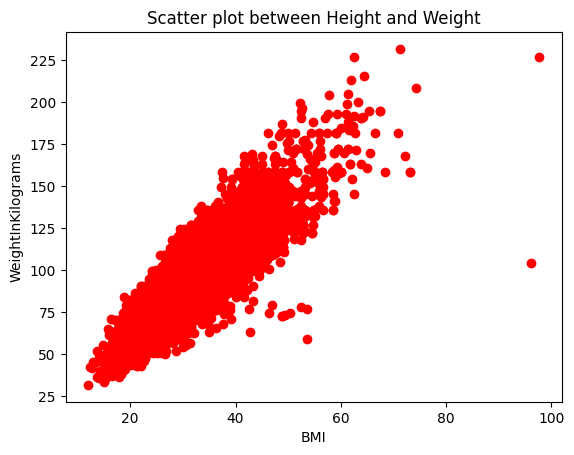

In [86]:
plot_height_weight_scatter(df,'BMI','WeightInKilograms')

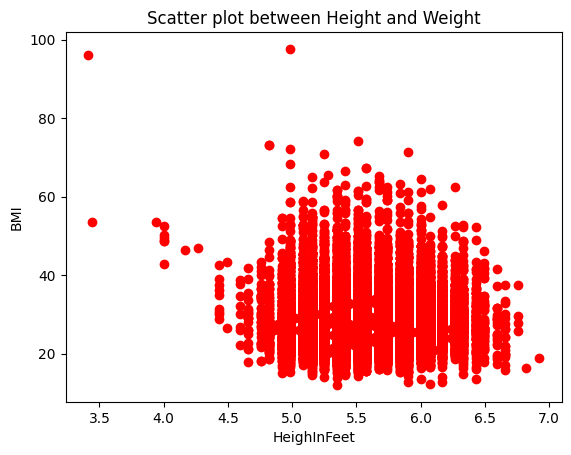

In [87]:
plot_height_weight_scatter(df,'HeighInFeet','BMI')

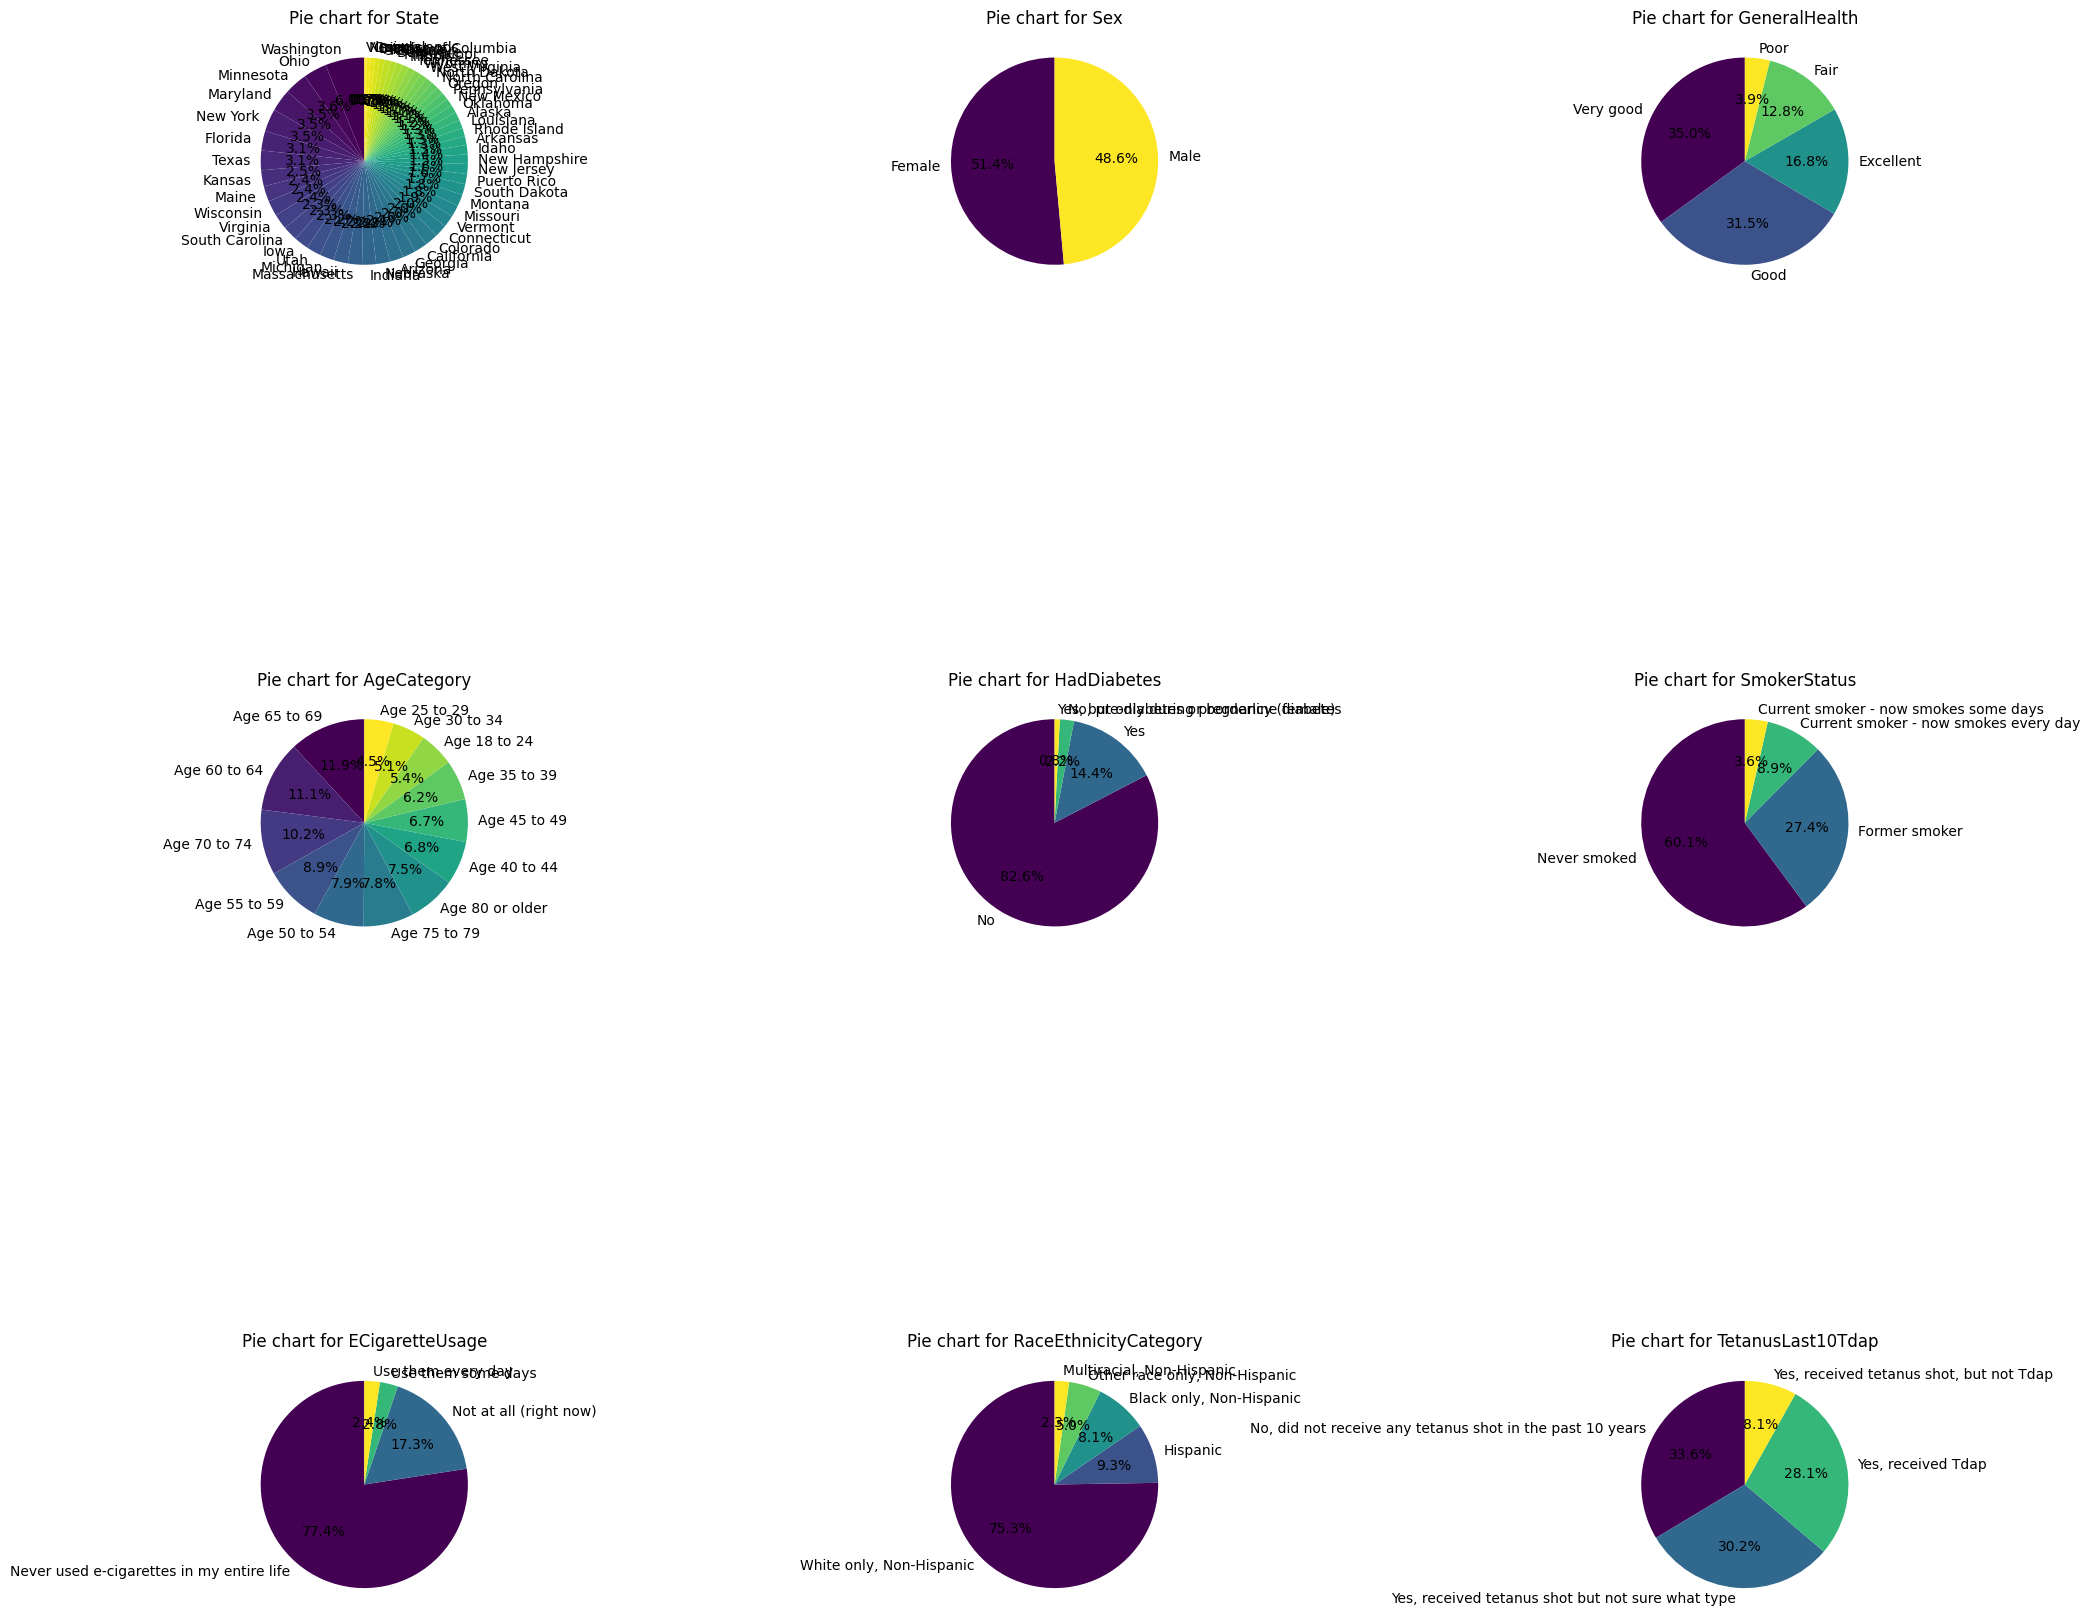

In [89]:
categorical_columns = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[i])
    axes[i].set_title(f'Pie chart for {column}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Insights for State:
  - Washington: 6.09%
  - Ohio: 3.63%
  - Minnesota: 3.54%
  - Maryland: 3.52%
  - New York: 3.51%
  - Florida: 3.06%
  - Texas: 3.06%
  - Kansas: 2.49%
  - Maine: 2.42%
  - Wisconsin: 2.42%
  - Virginia: 2.41%
  - South Carolina: 2.30%
  - Iowa: 2.27%
  - Utah: 2.26%
  - Michigan: 2.23%
  - Hawaii: 2.23%
  - Massachusetts: 2.22%
  - Indiana: 2.19%
  - Nebraska: 2.16%
  - Arizona: 2.12%
  - Georgia: 2.05%
  - California: 2.04%
  - Colorado: 2.02%
  - Connecticut: 1.96%
  - Vermont: 1.87%
  - Missouri: 1.85%
  - Montana: 1.80%
  - South Dakota: 1.70%
  - Puerto Rico: 1.60%
  - New Jersey: 1.56%
  - New Hampshire: 1.49%
  - Idaho: 1.45%
  - Arkansas: 1.34%
  - Rhode Island: 1.33%
  - Louisiana: 1.30%
  - Alaska: 1.30%
  - Oklahoma: 1.28%
  - New Mexico: 1.18%
  - Pennsylvania: 1.17%
  - Oregon: 1.12%
  - North Carolina: 1.12%
  - North Dakota: 1.11%
  - West Virginia: 1.08%
  - Wyoming: 1.07%
  - Tennessee: 1.07%
  - Illinois: 1.00%
  - Mississippi: 0.97%
  - Delaware: 0.96%
  - Kentucky: 0.95%
  - Alabama: 0.79%
  - District of Columbia: 0.72%
  - Guam: 0.69%
  - Nevada: 0.64%
  - Virgin Islands: 0.34%


Insights for Sex:
  - Female: 51.44%
  - Male: 48.56%


Insights for GeneralHealth:
  - Very good: 35.02%
  - Good: 31.52%
  - Excellent: 16.78%
  - Fair: 12.78%
  - Poor: 3.90%


Insights for AgeCategory:
  - Age 65 to 69: 11.87%
  - Age 60 to 64: 11.08%
  - Age 70 to 74: 10.20%
  - Age 55 to 59: 8.89%
  - Age 50 to 54: 7.85%
  - Age 75 to 79: 7.81%
  - Age 80 or older: 7.52%
  - Age 40 to 44: 6.79%
  - Age 45 to 49: 6.67%
  - Age 35 to 39: 6.24%
  - Age 18 to 24: 5.39%
  - Age 30 to 34: 5.15%
  - Age 25 to 29: 4.54%


Insights for HadDiabetes:
  - No: 82.60%
  - Yes: 14.38%
  - No, pre-diabetes or borderline diabetes: 2.20%
  - Yes, but only during pregnancy (female): 0.81%


Insights for SmokerStatus:
  - Never smoked: 60.11%
  - Former smoker: 27.44%
  - Current smoker - now smokes every day: 8.89%
  - Current smoker - now smokes some days: 3.56%


Insights for ECigaretteUsage:
  - Never used e-cigarettes in my entire life: 77.44%
  - Not at all (right now): 17.33%
  - Use them some days: 2.81%
  - Use them every day: 2.42%


Insights for RaceEthnicityCategory:
  - White only, Non-Hispanic: 75.26%
  - Hispanic: 9.30%
  - Black only, Non-Hispanic: 8.15%
  - Other race only, Non-Hispanic: 5.04%
  - Multiracial, Non-Hispanic: 2.26%


Insights for TetanusLast10Tdap:
  - No, did not receive any tetanus shot in the past 10 years: 33.61%
  - Yes, received tetanus shot but not sure what type: 30.19%
  - Yes, received Tdap: 28.10%
  - Yes, received tetanus shot, but not Tdap: 8.10%

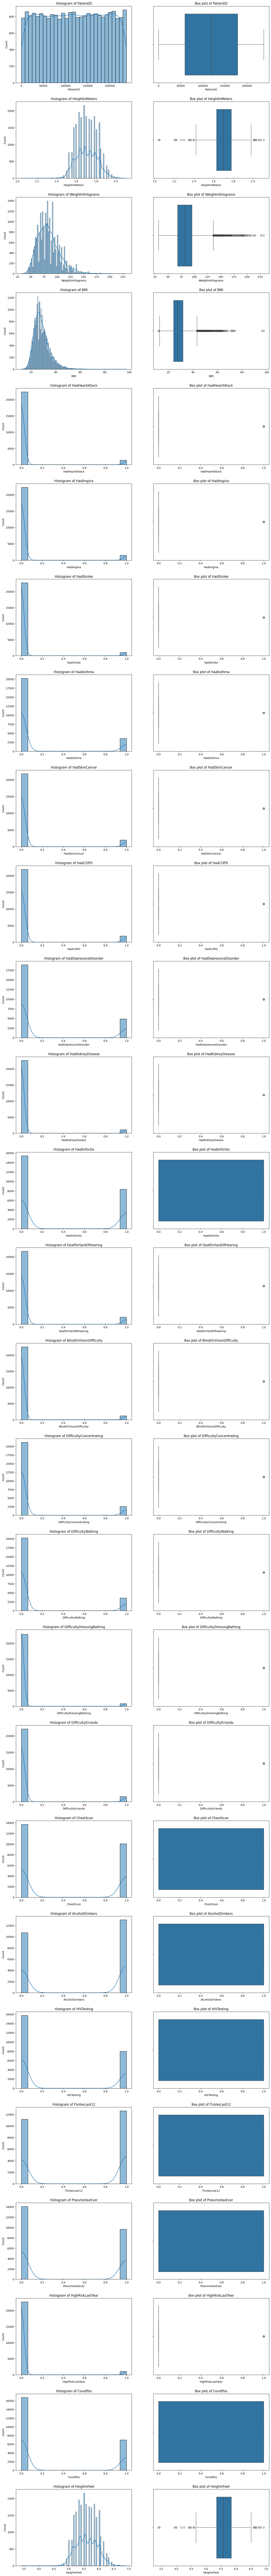

In [92]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 5 * len(numerical_columns)))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column}')
    
    # Box plot
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {column}')

plt.show()

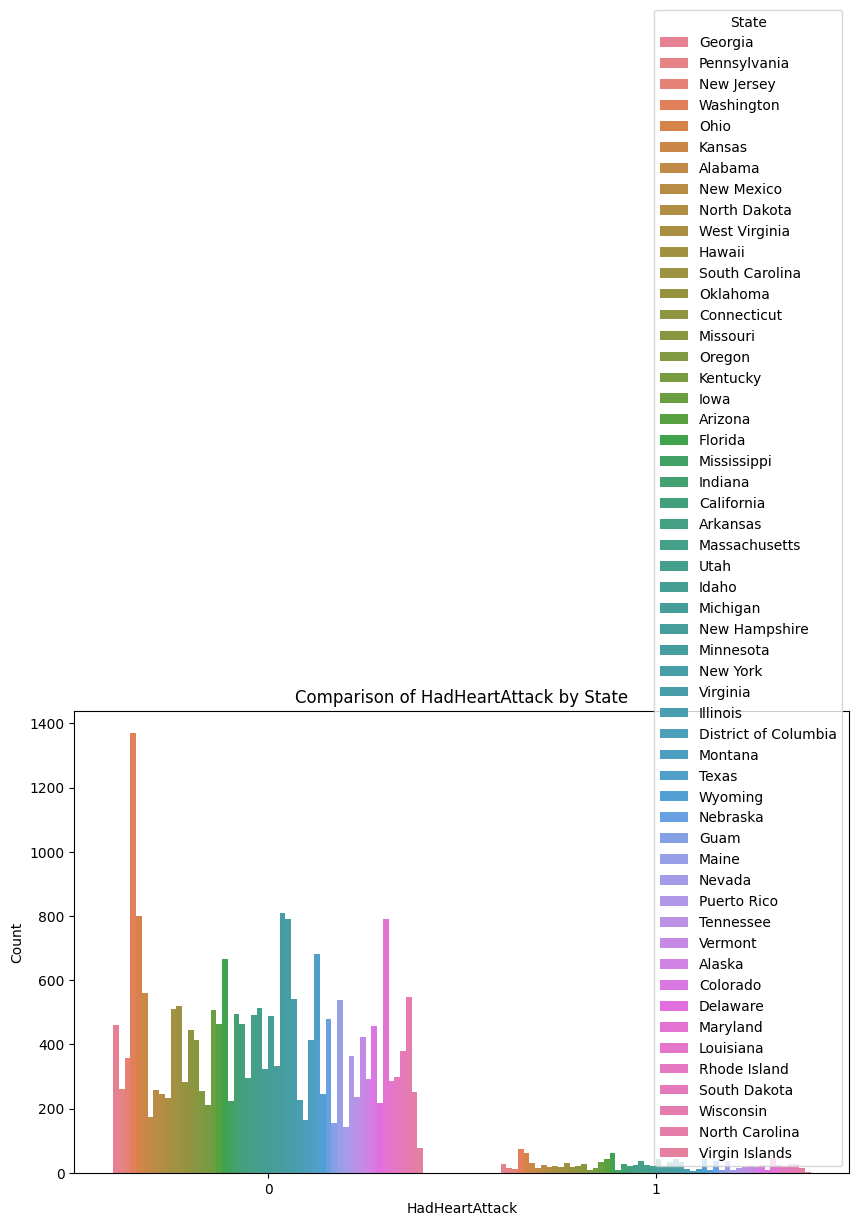

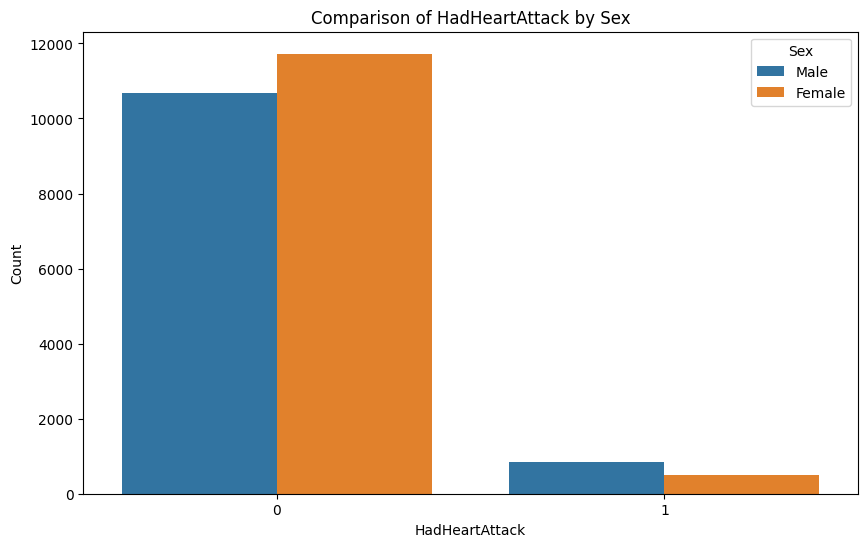

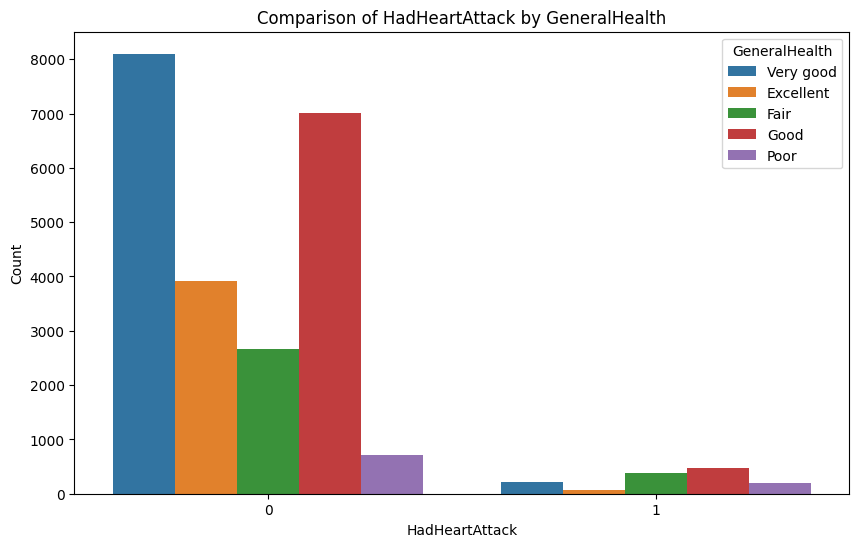

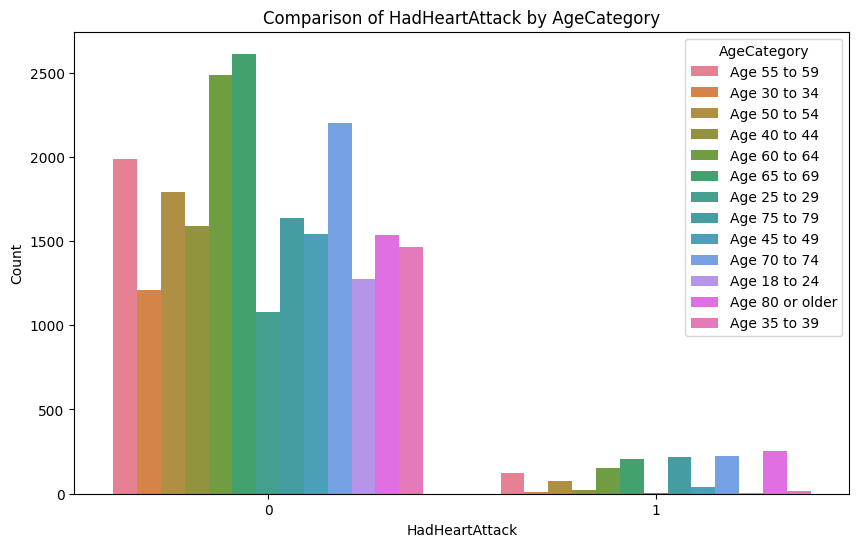

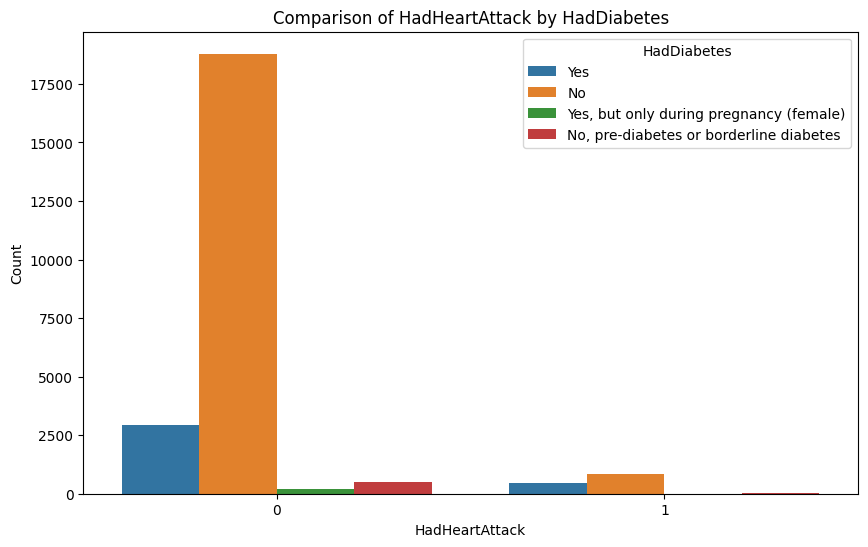

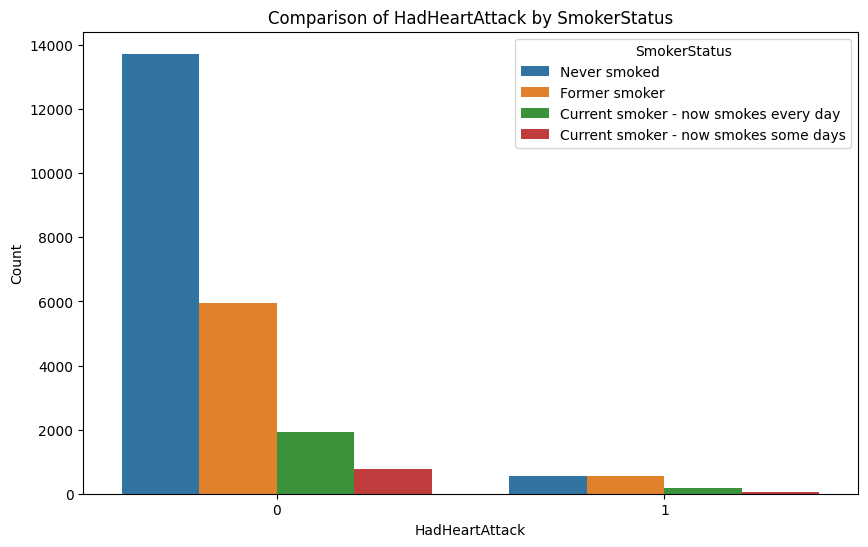

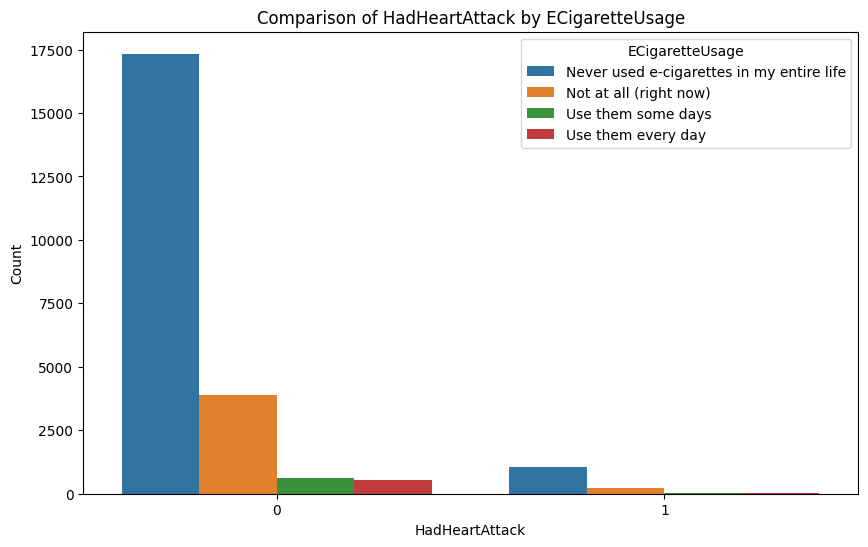

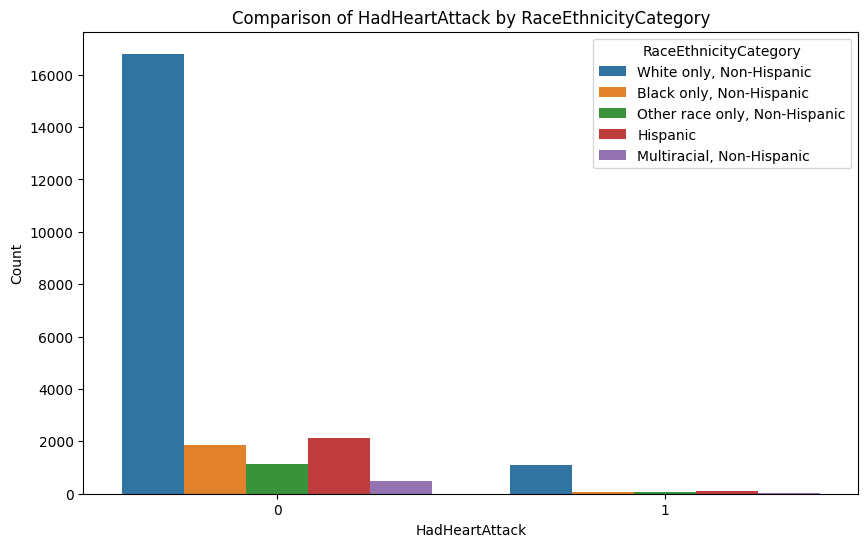

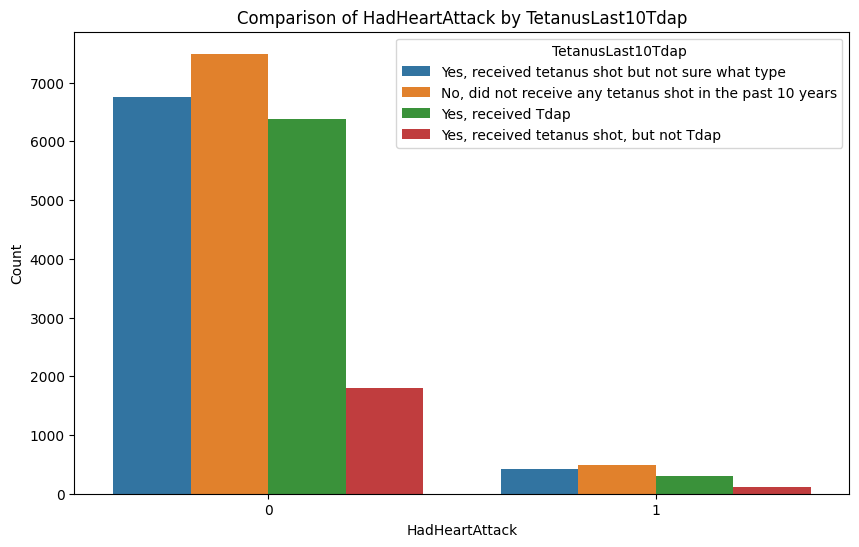

In [98]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='HadHeartAttack', hue=column, data=df)
    plt.title(f'Comparison of HadHeartAttack by {column}')
    plt.xlabel('HadHeartAttack')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.show()

Columns with high correlation: ['WeightInKilograms', 'BMI']
Columns with low correlation: {'BlindOrVisionDifficulty', 'ChestScan', 'FluVaxLast12', 'PneumoVaxEver', 'CovidPos', 'HadStroke', 'HadArthritis', 'HIVTesting', 'HadHeartAttack', 'HadAsthma', 'HadKidneyDisease', 'DifficultyDressingBathing', 'HadDepressiveDisorder', 'HadSkinCancer', 'HeightInMeters', 'DifficultyWalking', 'DifficultyErrands', 'BMI', 'HighRiskLastYear', 'DeafOrHardOfHearing', 'HadAngina', 'AlcoholDrinkers', 'WeightInKilograms', 'PatientID', 'HadCOPD', 'DifficultyConcentrating'}

Insights from Correlation Heatmap:
Highly correlated pairs of columns (correlation > 0.8):
  - WeightInKilograms and BMI
  - BMI and WeightInKilograms

Columns with low correlation (correlation < 0.8):
  - BlindOrVisionDifficulty
  - ChestScan
  - FluVaxLast12
  - PneumoVaxEver
  - CovidPos
  - HadStroke
  - HadArthritis
  - HIVTesting
  - HadHeartAttack
  - HadAsthma
  - HadKidneyDisease
  - DifficultyDressingBathing
  - HadDepressiveDisorder
  - HadSkinCancer
  - HeightInMeters
  - DifficultyWalking
  - DifficultyErrands
  - BMI
  - HighRiskLastYear
  - DeafOrHardOfHearing
  - HadAngina
  - AlcoholDrinkers
  - WeightInKilograms
  - PatientID
  - HadCOPD
  - DifficultyConcentrating

Insights from Scatter Plots:
Scatter plot between HeightInMeters and WeightInKilograms shows a positive correlation.
Scatter plot between BMI and WeightInKilograms shows a strong positive correlation.
Scatter plot between HeighInFeet and BMI shows a positive correlation.

Insights from Pie Charts:
State distribution shows that Washington has the highest percentage of 6.09%.
Sex distribution shows that Female is slightly higher than Male with 51.44%.
GeneralHealth distribution shows that 'Very good' is the most common category with 35.02%.
AgeCategory distribution shows that 'Age 65 to 69' is the most common category with 11.87%.
HadDiabetes distribution shows that 'No' is the most common category with 82.60%.
SmokerStatus distribution shows that 'Never smoked' is the most common category with 60.11%.
ECigaretteUsage distribution shows that 'Never used e-cigarettes in my entire life' is the most common category with 77.44%.
RaceEthnicityCategory distribution shows that 'White only, Non-Hispanic' is the most common category with 75.26%.
TetanusLast10Tdap distribution shows that 'No, did not receive any tetanus shot in the past 10 years' is the most common category with 33.61%.

Insights from Histograms and Box Plots:
  - PatientID:
    - Histogram shows the distribution of PatientID.
    - Box plot shows the spread and outliers of PatientID.
  - HeightInMeters:
    - Histogram shows the distribution of HeightInMeters.
    - Box plot shows the spread and outliers of HeightInMeters.
  - WeightInKilograms:
    - Histogram shows the distribution of WeightInKilograms.
    - Box plot shows the spread and outliers of WeightInKilograms.
  - BMI:
    - Histogram shows the distribution of BMI.
    - Box plot shows the spread and outliers of BMI.
  - HadHeartAttack:
    - Histogram shows the distribution of HadHeartAttack.
    - Box plot shows the spread and outliers of HadHeartAttack.
  - HadAngina:
    - Histogram shows the distribution of HadAngina.
    - Box plot shows the spread and outliers of HadAngina.
  - HadStroke:
    - Histogram shows the distribution of HadStroke.
    - Box plot shows the spread and outliers of HadStroke.
  - HadAsthma:
    - Histogram shows the distribution of HadAsthma.
    - Box plot shows the spread and outliers of HadAsthma.
  - HadSkinCancer:
    - Histogram shows the distribution of HadSkinCancer.
    - Box plot shows the spread and outliers of HadSkinCancer.
  - HadCOPD:
    - Histogram shows the distribution of HadCOPD.
    - Box plot shows the spread and outliers of HadCOPD.
  - HadDepressiveDisorder:
    - Histogram shows the distribution of HadDepressiveDisorder.
    - Box plot shows the spread and outliers of HadDepressiveDisorder.
  - HadKidneyDisease:
    - Histogram shows the distribution of HadKidneyDisease.
    - Box plot shows the spread and outliers of HadKidneyDisease.
  - HadArthritis:
    - Histogram shows the distribution of HadArthritis.
    - Box plot shows the spread and outliers of HadArthritis.
  - DeafOrHardOfHearing:
    - Histogram shows the distribution of DeafOrHardOfHearing.
    - Box plot shows the spread and outliers of DeafOrHardOfHearing.
  - BlindOrVisionDifficulty:
    - Histogram shows the distribution of BlindOrVisionDifficulty.
    - Box plot shows the spread and outliers of BlindOrVisionDifficulty.
  - DifficultyConcentrating:
    - Histogram shows the distribution of DifficultyConcentrating.
    - Box plot shows the spread and outliers of DifficultyConcentrating.
  - DifficultyWalking:
    - Histogram shows the distribution of DifficultyWalking.
    - Box plot shows the spread and outliers of DifficultyWalking.
  - DifficultyDressingBathing:
    - Histogram shows the distribution of DifficultyDressingBathing.
    - Box plot shows the spread and outliers of DifficultyDressingBathing.
  - DifficultyErrands:
    - Histogram shows the distribution of DifficultyErrands.
    - Box plot shows the spread and outliers of DifficultyErrands.
  - ChestScan:
    - Histogram shows the distribution of ChestScan.
    - Box plot shows the spread and outliers of ChestScan.
  - AlcoholDrinkers:
    - Histogram shows the distribution of AlcoholDrinkers.
    - Box plot shows the spread and outliers of AlcoholDrinkers.
  - HIVTesting:
    - Histogram shows the distribution of HIVTesting.
    - Box plot shows the spread and outliers of HIVTesting.
  - FluVaxLast12:
    - Histogram shows the distribution of FluVaxLast12.
    - Box plot shows the spread and outliers of FluVaxLast12.
  - PneumoVaxEver:
    - Histogram shows the distribution of PneumoVaxEver.
    - Box plot shows the spread and outliers of PneumoVaxEver.
  - HighRiskLastYear:
    - Histogram shows the distribution of HighRiskLastYear.
    - Box plot shows the spread and outliers of HighRiskLastYear.
  - CovidPos:
    - Histogram shows the distribution of CovidPos.
    - Box plot shows the spread and outliers of CovidPos.
  - HeighInFeet:
    - Histogram shows the distribution of HeighInFeet.
    - Box plot shows the spread and outliers of HeighInFeet.

In [101]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HeighInFeet'],
      dtype='object')

In [102]:
df.head(
    1
)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeighInFeet
39973,39974,Georgia,Male,Very good,Age 55 to 59,1.83,122.470001,36.619999,0,0,0,0,0,0,0,0,0,Yes,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,0,0,"Yes, received tetanus shot but not sure what type",0,0,6.003937


In [103]:
df.drop(['PatientID','State','TetanusLast10Tdap'],inplace=True,axis=1)
df.drop(['ECigaretteUsage','RaceEthnicityCategory'],inplace=True,axis=1)

df['SmokerStatus'] = df['SmokerStatus'].replace({'Current smoker - now smokes every day':'Former smoker','Current smoker - now smokes some days':'Former smoker'})
df['HadDiabetes'] = df['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes':'Borderline diabetes','Yes, but only during pregnancy (female)':'Pregaency diabetes (Female)'})

In [111]:
df.head(5)

,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos,HeighInFeet
39973,Male,Very good,Age 55 to 59,1.83,122.470001,36.619999,0,0,0,0,0,0,0,0,0,Yes,0,0,0,0,0,0,Never smoked,0,0,0,0,0,0,0,6.003937
169551,Female,Very good,Age 30 to 34,1.60,57.610001,22.500000,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Never smoked,0,0,0,0,0,0,0,5.249344
132069,Female,Excellent,Age 50 to 54,1.55,53.520000,22.299999,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Never smoked,1,1,1,0,0,0,0,5.085302
216716,Male,Excellent,Age 40 to 44,1.78,86.180000,27.260000,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Former smoker,1,0,0,0,0,0,0,5.839895
151299,Male,Fair,Age 60 to 64,1.83,113.400002,33.910000,0,0,1,0,0,0,0,0,1,Yes,0,0,0,0,0,0,Former smoker,1,0,0,1,1,0,0,6.003937


In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV




In [114]:
df.dtypes

Sex                           object
GeneralHealth                 object
AgeCategory                   object
HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                   object
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                  object
ChestScan                      int64
AlcoholDrinkers                int64
HIVTesting                     int64
FluVaxLast12                   int64
P

In [116]:
df['HadDiabetes'].value_counts()

HadDiabetes
No                                         19629
Yes                                         3418
No, pre-diabetes or borderline diabetes      523
Yes, but only during pregnancy (female)      193
Name: count, dtype: int64

In [119]:
#df[['AgeCategory','GeneralHealth','Sex','HadDiabetes','SmokerStatus']].value_counts()

def one_hot_encoding(df, column):
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

df = one_hot_encoding(df, ['AgeCategory','GeneralHealth','Sex','HadDiabetes','SmokerStatus'])

df.head ()



,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos,HeighInFeet,AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,Sex_Female,Sex_Male,HadDiabetes_Borderline diabetes,HadDiabetes_No,HadDiabetes_Pregaency diabetes (Female),HadDiabetes_Yes,SmokerStatus_Former smoker,SmokerStatus_Never smoked
39973,1.83,122.470001,36.619999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.003937,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True
169551,1.60,57.610001,22.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.249344,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True
132069,1.55,53.520000,22.299999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,5.085302,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True
216716,1.78,86.180000,27.260000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5.839895,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False
151299,1.83,113.400002,33.910000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,6.003937,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False


In [124]:
df = df.replace({False: 0, True: 1})

C:\Users\aakas\AppData\Local\Temp\ipykernel_8172\669562365.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({False: 0, True: 1})


In [125]:
df.head()

,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos,HeighInFeet,AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,Sex_Female,Sex_Male,HadDiabetes_Borderline diabetes,HadDiabetes_No,HadDiabetes_Pregaency diabetes (Female),HadDiabetes_Yes,SmokerStatus_Former smoker,SmokerStatus_Never smoked
39973,1.83,122.470001,36.619999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.003937,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
169551,1.60,57.610001,22.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.249344,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
132069,1.55,53.520000,22.299999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,5.085302,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
216716,1.78,86.180000,27.260000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5.839895,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
151299,1.83,113.400002,33.910000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,6.003937,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0


In [ ]:
#TODO: SMOTE for imbalanced data

In [126]:
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    return accuracy, confusion, classification_rep



In [131]:
evaluate_model(RandomForestClassifier(), X_train, y_train, X_test, y_test)

(0.9389859036398064,
 array([[4434,   33],
        [ 257,   29]]),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97      4467\n           1       0.47      0.10      0.17       286\n\n    accuracy                           0.94      4753\n   macro avg       0.71      0.55      0.57      4753\nweighted avg       0.92      0.94      0.92      4753\n')

In [135]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_params_

best_model = grid_search.best_estimator_
accuracy, confusion, classification_rep = evaluate_model(best_model, X_train, y_train, X_test, y_test)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# evaluate_model(RandomForestClassifier(n_estimators=300, max_depth=30, min_samples_split=2, min_samples_leaf=1), X_train, y_train, X_test, y_test)

# evaluate_model(LogisticRegression(), X_train, y_train, X_test, y_test)

# evaluate_model(SVC(), X_train, y_train, X_test, y_test)

# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [2, 3, 4]
# }

# grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

# grid_search.fit(X_train, y_train)

# grid_search.best_params_

# evaluate_model(SVC(C=10, degree=2, kernel='linear'), X_train, y_train, X_test, y_test)

# df.to_csv(cwd + '/data/final_csv/final_cleaned.csv', index=False)


Accuracy: 0.9402482642541553
Confusion Matrix:
 [[4443   24]
 [ 260   26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      4467
           1       0.52      0.09      0.15       286

    accuracy                           0.94      4753
   macro avg       0.73      0.54      0.56      4753
weighted avg       0.92      0.94      0.92      4753



In [128]:
evaluate_model(LogisticRegression(), X_train, y_train, X_test, y_test)


(0.9413002314327793,
 array([[4412,   55],
        [ 224,   62]]),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.99      0.97      4467\n           1       0.53      0.22      0.31       286\n\n    accuracy                           0.94      4753\n   macro avg       0.74      0.60      0.64      4753\nweighted avg       0.93      0.94      0.93      4753\n')

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Check the mean and standard deviation
mean = np.mean(scaled_data, axis=0)
std_dev = np.std(scaled_data, axis=0)

print("Mean of scaled data:", mean)
print("Standard deviation of scaled data:", std_dev)

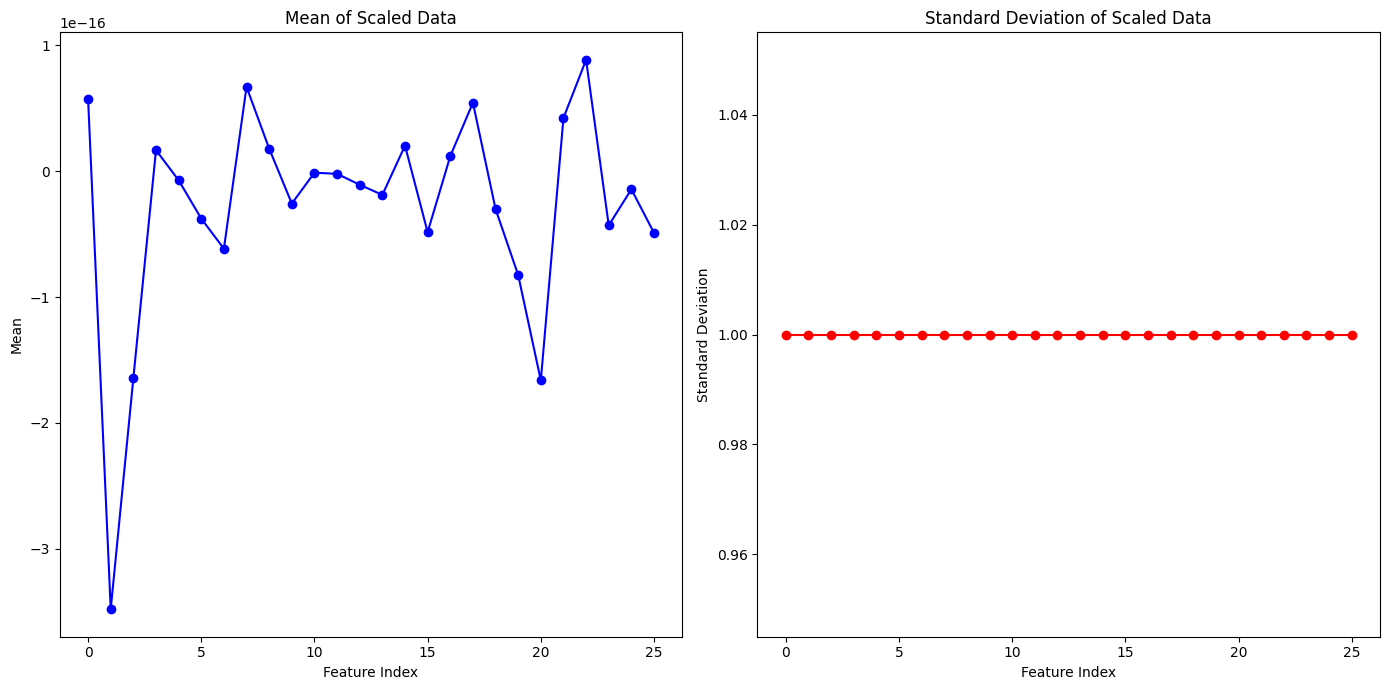

In [31]:
plt.figure(figsize=(14, 7))

# Plot mean
plt.subplot(1, 2, 1)
plt.plot(mean, marker='o', linestyle='-', color='b')
plt.title('Mean of Scaled Data')
plt.xlabel('Feature Index')
plt.ylabel('Mean')

# Plot standard deviation
plt.subplot(1, 2, 2)
plt.plot(std_dev, marker='o', linestyle='-', color='r')
plt.title('Standard Deviation of Scaled Data')
plt.xlabel('Feature Index')
plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()